In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os 
import sys
import json
import numpy as np 
from json import JSONDecodeError  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.dates as mdates
from scipy import stats
from matplotlib.cbook import boxplot_stats
from scipy.stats import iqr
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn import preprocessing
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import spatial
from sklearn.model_selection import train_test_split



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

#uncomment for google drive
df = pd.read_csv('/content/drive/My Drive/mldm_cw/datasets/billboard_1950-2019_ultimate_3.0.csv')
df2 = pd.read_csv('/content/drive/My Drive/mldm_cw/datasets/2020songs.csv')



#values from the lstm model
current_trend =[0.19937964,0.7092857,0.6433672,0.15416627,0.70449007,0.53694385]

#cleaning dataframes
print(len(df))
df.drop_duplicates(subset ="trackID", keep = False, inplace = True)
df2.drop_duplicates(subset ="trackID", keep = False, inplace = True)
del df2['Unnamed: 0']
print(len(df))

#normalisation function
def normal(x):
  normalised = (x-min(df['loudness']))/(max(df['loudness'])-min(df['loudness']))
  return normalised


def normal2(x):
  normalised = (x-min(df2['loudness']))/(max(df2['loudness'])-min(df2['loudness']))
  return normalised

def popular(x):
  pop = x/100
  return pop

#cosine similairity function 
def cosine_similarity(x):
    similarity =[]
    for index, row in x.iterrows():
      attr = [row['acousticness'],row['danceability'],row['energy'],row['liveness'],row['loudness'],row['valence']]
      result =  1 - spatial.distance.cosine(current_trend, attr)
      similarity.append(result)

    return similarity

# train
df['loudness'] = df['loudness'].apply(normal)

df['popularity']= df['popularity'].apply(popular)

#test
df2['loudness'] = df2['loudness'].apply(normal2)

df2['popularity']= df2['popularity'].apply(popular)

df.drop(df[df.popularity < 0.09].index, inplace=True)

#train
similarity = cosine_similarity(df)
se = pd.Series(similarity)
df['similarity'] = se.values

#test
similarity2 = cosine_similarity(df2)
se2 = pd.Series(similarity2)
df2['similarity'] = se2.values

#df.drop(df[(df.popularity < 0.30) & (df.similarity>0.9)].index, inplace=True)
#train
cols = df.columns.tolist()

cols = cols[0:len(cols)-2]+[cols[-1]]+[cols[-2]]
df = df[cols]

#test
cols = df2.columns.tolist()

cols = cols[0:len(cols)-2]+[cols[-1]]+[cols[-2]]
df2 = df2[cols]




5759
5759


In [ ]:
# load head of dataframe and check how many data point therea are 
df2.head()
print(len(df2))


460


5352


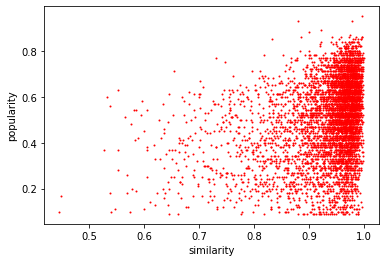

In [ ]:
#graphing the similarity against the popularity.
print(len(df))
df.plot(kind='scatter',x='similarity',y='popularity',color='red',s=1)
plt.show()



In [ ]:
from sklearn.svm import SVR
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
cols = df.columns.tolist()
print(cols[5:12])
X = df.iloc[:,5:12].values.astype(float)
y = df.iloc[:,-1:].values.astype(float)



X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)


regressor = SVR(kernel= 'rbf', C=10,gamma=2)
regressor.fit(X_train, y_train)

train_predicted = regressor.predict(X_train)
val_predicted = regressor.predict(X_val)
print(len(X_train))
print(len(train_predicted))

train_rmse = sqrt(mean_squared_error(y_train,train_predicted))
val_rmse = sqrt(mean_squared_error(y_val,val_predicted))



print('train rmse = ',train_rmse)
print('val rmse = ',val_rmse)

#test set prediction 
X_test = df2.iloc[:,3:10].values.astype(float)
y_test = df2.iloc[:,-1:].values.astype(float)

test_predicted = regressor.predict(X_test)

test_rmse = sqrt(mean_squared_error(y_test,test_predicted))

print(y_test[71],test_predicted[71])

print('test rmse =',test_rmse)






['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'valence', 'similarity']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



3746
3746
train rmse =  0.1507938076908533
val rmse =  0.15131172515107522
[0.69] 0.6060804434412985
test rmse = 0.21231246403710097


In [ ]:
 from sklearn.neural_network import MLPRegressor
# MLP model
MLPregressor = MLPRegressor(random_state=1, max_iter=100,learning_rate_init=0.001,hidden_layer_sizes=(10000,)).fit(X_train, y_train)



train_predicted = MLPregressor.predict(X_train)
val_predicted = MLPregressor.predict(X_val)
print(len(X_train))
print(len(train_predicted))

train_rmse = sqrt(mean_squared_error(y_train,train_predicted))
val_rmse = sqrt(mean_squared_error(y_val,val_predicted))



print('train rmse = ',train_rmse)
print('val rmse = ',val_rmse)

test_predicted = MLPregressor.predict(X_test)

test_rmse = sqrt(mean_squared_error(y_test,test_predicted))



print(y_test[71],test_predicted[71])

print('test rmse =',test_rmse)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



3746
3746
train rmse =  0.15772045990283368
val rmse =  0.15253007457083548
[0.69] 0.5900178986488598
test rmse = 0.20161335383890402


In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFregressor = RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state=1,max_features='sqrt').fit(X_train, y_train)

#trainset prediction
train_predicted = RFregressor.predict(X_train)
val_predicted = RFregressor.predict(X_val)
print(len(X_train))
print(len(train_predicted))

train_rmse = sqrt(mean_squared_error(y_train,train_predicted))
val_rmse = sqrt(mean_squared_error(y_val,val_predicted))



print('train rmse = ',train_rmse)
print('val rmse = ',val_rmse)

#test set prediction
test_predicted = RFregressor.predict(X_test)

test_rmse = sqrt(mean_squared_error(y_test,test_predicted))



print(y_test[72],test_predicted[72])

print('test rmse =',test_rmse)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



3746
3746
train rmse =  0.15188694449116472
val rmse =  0.15203043875440025
[0.68] 0.5785565866998055
test rmse = 0.20192784834801378
